In [26]:
%pylab inline
import astropy.constants as csts

Populating the interactive namespace from numpy and matplotlib


4332.979279251294


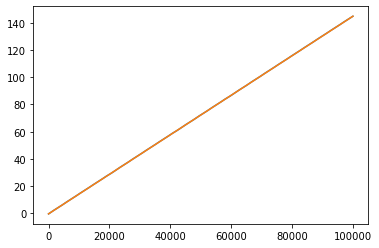

In [17]:
filename = "jupiter.txt"
data = np.loadtxt(filename,skiprows=18, max_rows=10000)

t = data[:,0] - data[0,0]
x = data[:,1]
y = data[:,2]
z = data[:,3]
theta = np.unwrap(np.angle(x+1j*y))
r = np.sqrt(x**2+y**2+z**2)
plt.plot(t,theta)
a,b  = np.polyfit(t,theta,1)
plt.plot(t,a*t+b)
period = 2*np.pi / a
print(period)

(3.36340642347326e+18, <Quantity 3.36164538e+18 m3 / s2>)

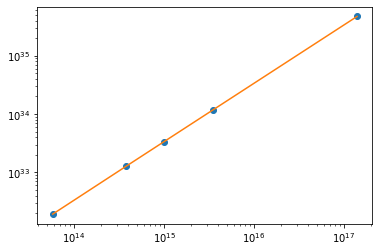

In [33]:
T, a = [], []

for name in ["mercury", "venus", "earth", "mars", "jupiter"]:
    filename = name + ".txt"
    data = np.loadtxt(filename,skiprows=18, max_rows=10000)
    t = data[:,0] - data[0,0]
    x = data[:,1]
    y = data[:,2]
    z = data[:,3]
    theta = np.unwrap(np.angle(x+1j*y))
    r = np.sqrt(x**2+y**2+z**2)
    omega,b  = np.polyfit(t,theta,1)
    period = 2*np.pi / omega
    T.append(period)
    a.append((max(r)+min(r))/2)

T = np.array(T)*3600*24
a = np.array(a)*csts.au

x = T**2
y = a**3

slope, offset = np.polyfit(x,y,1)
plt.loglog(x, y, "o")
plt.loglog(x, slope*x+offset)

slope, csts.G*csts.M_sun/4/np.pi**2